# Author: Vaishali Parande
## Data Science & Bussiness Analytics Intern
## GRIP @ The Sparks Foundation May 2021

## Task 4 : EDA - Retail

**● Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’** 

**● As a business manager, try to find out the weak areas where you can 
work to make more profit.** 

**● To derive business problems by exploring the data**

In [2]:
# importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading dataset and checking 1st five entries.

data = pd.read_csv("SampleSuperstore.csv")
data.head()

# dataset is taken from "https://bit.ly/3i4rbWl"

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
# checking the dimensions of data
data.shape

(9994, 13)

In [5]:
# checking feature names
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [6]:
# decsribing data
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
# check the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
# check for null values.
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
# check for duplicate values
data.duplicated().sum()

17

In [10]:
# drop duplicates and check again

print("before dropping duplicates")
print(data.shape)
print()
print("after dropping duplicates")
data = data.drop_duplicates()
print(data.shape)

before dropping duplicates
(9994, 13)

after dropping duplicates
(9977, 13)


In [11]:
# check correlation between the numerical features
data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


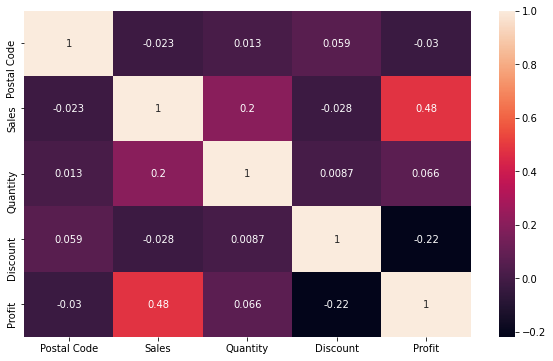

In [12]:
# plot the correlation plot

fig,axes = plt.subplots(1,1,figsize=(10,6))
sns.heatmap(data.corr(), annot= True)
plt.show()

**From the above correlation plot, the features profit-discount,sales-discount are seen as negatively correlated to each other.**

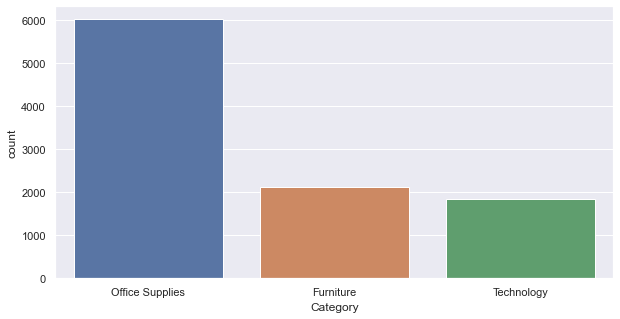

In [13]:
# check the category feature

plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.countplot(x='Category',data=data,order=data['Category'].value_counts().index)
plt.show()

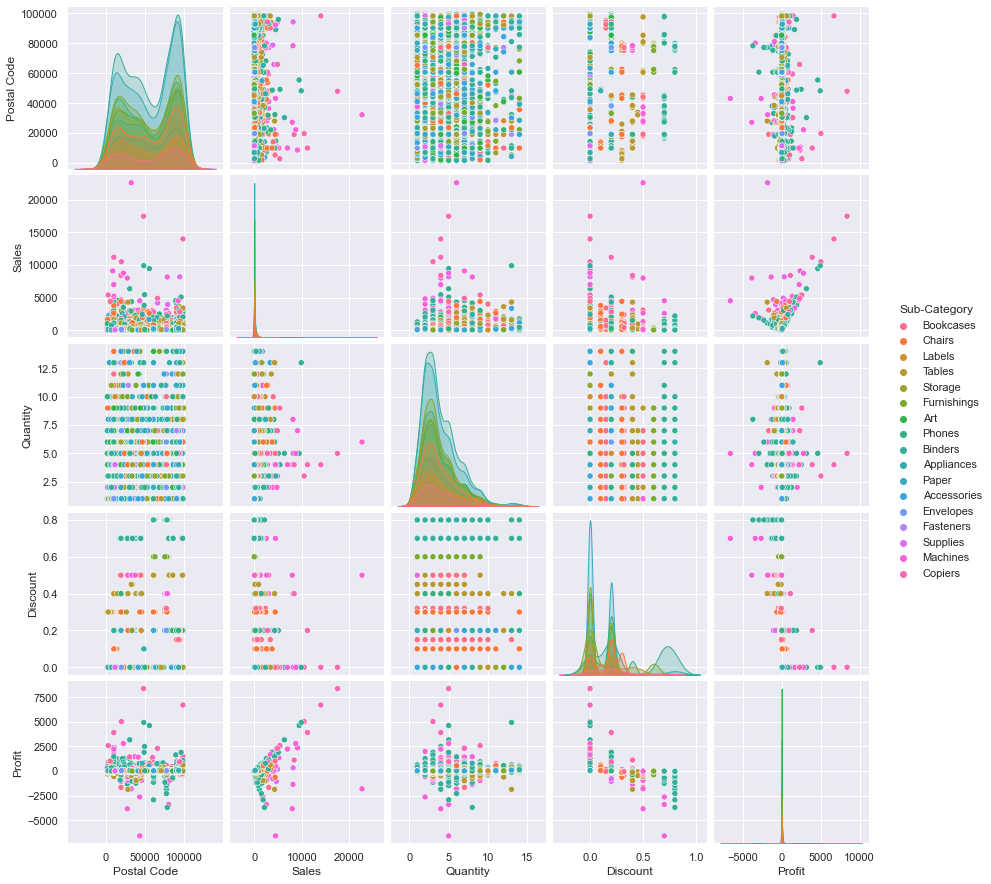

In [14]:
# plotting a pairplot to study the relationship between variables.

figsize=(15,10)
sns.pairplot(data,hue='Sub-Category')

In [15]:
#from pandas_profiling import ProfileReport

In [16]:
# create the report
#profile = ProfileReport(data,title="Report",explorative=True)

In [17]:
#profile.to_file("output.html")

Total items in subcategory: 17


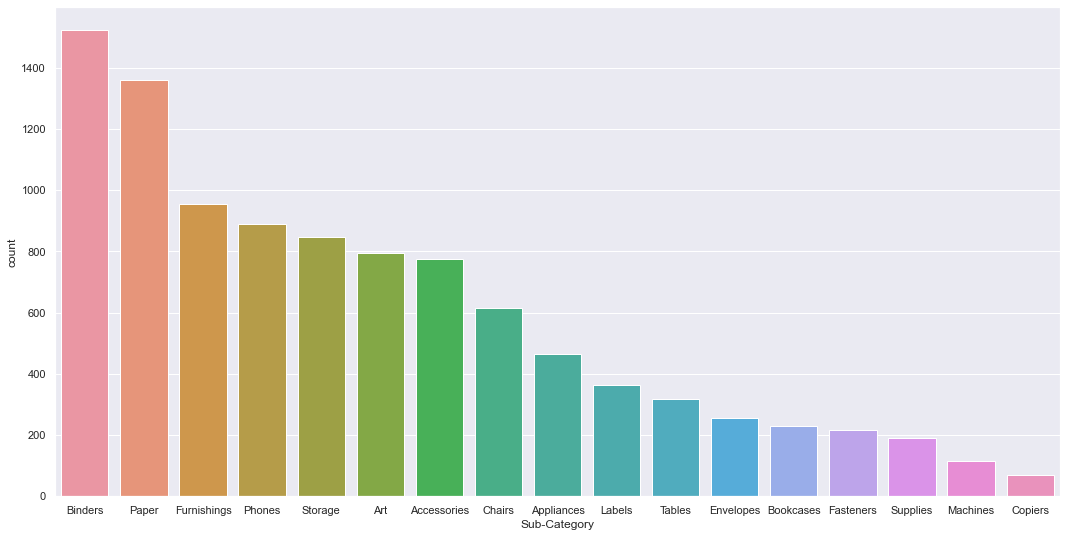

In [18]:
# items sold from the subcategory 

print("Total items in subcategory:",data['Sub-Category'].value_counts().nunique())
plt.figure(figsize=(18,9))
sns.set(style='darkgrid')
sns.countplot(x='Sub-Category',data=data,order=data['Sub-Category'].value_counts().index)
plt.show()

<AxesSubplot:xlabel='Discount', ylabel='Sales'>

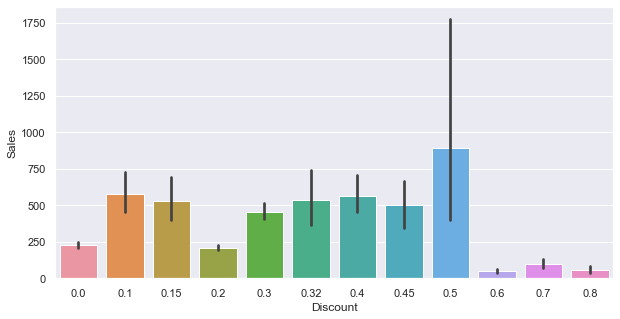

In [19]:
# check whether sales increased or not as per increase in the discount

plt.figure(figsize=(10,5))
sns.barplot(x=data['Discount'], y=data['Sales'])

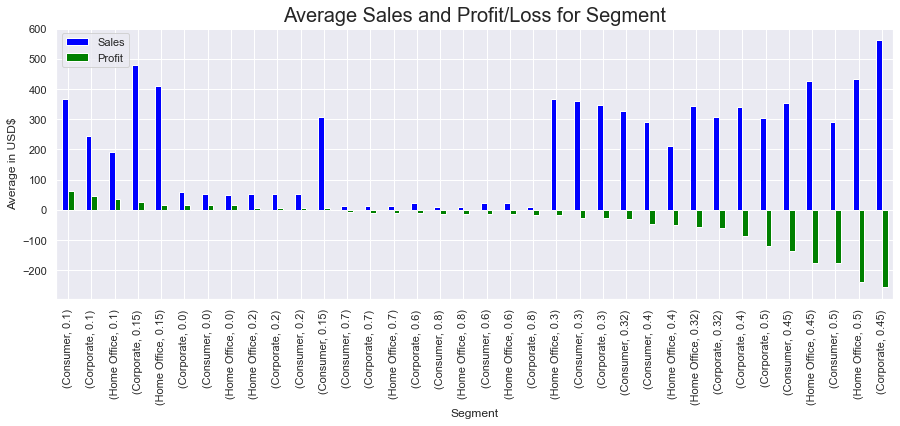

In [21]:
# checking the profit/loss associated segment feature
colors = ['blue', 'green']
df_region = data.groupby(['Segment','Discount'])[['Sales','Profit']].median()
df_region.sort_values('Profit', ascending = False)[['Sales', 'Profit']].plot(kind = 'bar',
                                                                             figsize = (15, 5),
                                                                             color = colors)

plt.ylabel('Average in USD$')
plt.xlabel('Segment')
plt.title('Average Sales and Profit/Loss for Segment', fontsize = 20)
plt.show()

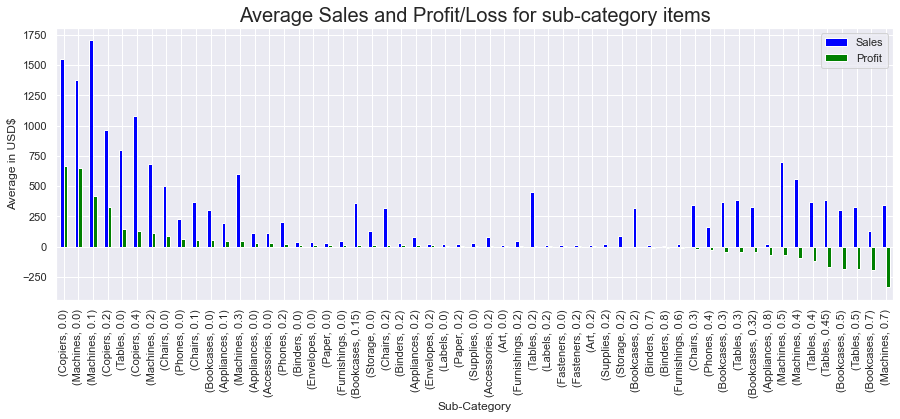

In [22]:
# average  profit/loss associated with sub-category items
colors = ['blue', 'green']
df_region = data.groupby(['Sub-Category','Discount'])[['Sales','Profit']].median()
df_region.sort_values('Profit', ascending = False)[['Sales', 'Profit']].plot(kind = 'bar',
                                                                             figsize = (15, 5),
                                                                             color = colors)

plt.ylabel('Average in USD$')
plt.xlabel('Sub-Category')
plt.title('Average Sales and Profit/Loss for sub-category items', fontsize = 20)
plt.show()

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

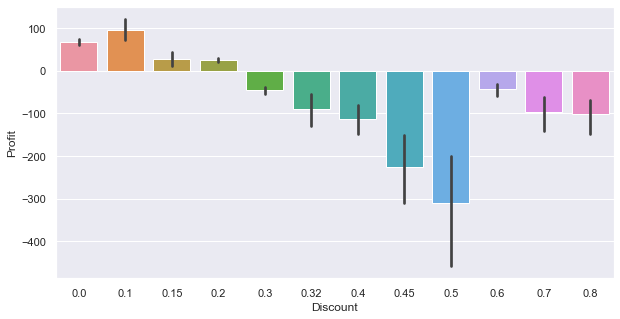

In [23]:
# check the profit vs discount

plt.figure(figsize=(10,5))
sns.barplot(x=data['Discount'], y=data['Profit'])

Losses started after icreasing the profit more than 20%

The worst losses occured when discount is 50%.

Superstore will be in profit when the discount levels will be  less than 10%

## Conclusion
### **Thus, I have successfully performed exploratory data analysis on SampleSuperStore dataset and analysed the reason behind the loss of the ratail.**

# Thank You
